# Project: Write a Data Science Blog Post

Note from author: I broke down the Data Preparation, Data Modeling and Evaluation into each question for consistency so that Data Preparation, Data Modeling and Evaluation are more tailored to the questions.

# Index
1. Business Understanding\
    1.1 Brief Description\
    1.2 Business Questions
2. Data Understanding
3. Question 1\
    3.1 Prepare Data
        3.1.1 Convert Data Types
        3.1.2 Convert missing values
    3.2 Evaluation
        3.2.1 Analysis
        3.2.2 Visualization
        3.2.3 Brief explanation for visualization
4. Question 2\
    4.1 Prepare Data
        4.1.1 Convert Data Types
        4.1.2 Convert missing values
    4.2 Evaluation
        4.2.1 Visualization
        4.2.2 Brief explanation for visualization
5. Question 3\
    5.1 Prepare Data
        5.1.1 Convert Categorical Values
        5.1.2 Convert Data Types
        5.1.3 Convert missing values
        5.1.4 Summarize Data
    5.2 Data Modeling
        5.2.1 Fit Model
    5.3 Evaluation
        5.3.1 Analysis

# 1.Business Understanding

# 1.1 Brief Description

For the project, the dataset used is 2016 Seattle Airbnb dataset shared by Airbnb. I will fist generate 3 business questions and then apply the standard CRISP-DM process to conduct analysis to answer those questions. 

# 1.2 Business Questions

Questions 1: Which neighborhood is most budget-friendly for the stay in Seattle while maintaining a good experience for your time?\
Questions 2: What are features that could have a direct impact on the price and cleaning cost of Airbnb?\
Questions 3: What features would be the top indicators and drivers on the price of an Airbnb?

# 2. Data Understanding

To understand data, I first load several standard packages that will be used in this notebook. I then read the 3 csv data available and try to understand what each of columns and tables represent. I also spent some time reviewing the actual data source from Airbnb to read the definition of each columns since the columns definitions are not provided.

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
import statsmodels.api as sm
pd.set_option("display.max_columns", None)

In [70]:
calendar = pd.read_csv('calendar.csv')
listings =  pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [5]:
print(calendar.head(3))
print('Calendar has ' + str(calendar.shape[0]) + ' rows and ' + str(calendar.shape[1]) + ' columns.')

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
Calendar has 1393570 rows and 4 columns.


In [6]:
print(listings.head(3))
print('Listings has ' + str(listings.shape[0]) + ' rows and ' + str(listings.shape[1]) + ' columns.')
print(listings.columns)

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description exp

In [7]:
print(reviews.head(3))
print('Reviews has ' + str(reviews.shape[0]) + ' rows and ' + str(reviews.shape[1]) + ' columns.')

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
Reviews has 84849 rows and 6 columns.


---------------------------------------------------------------------------------------------------------------\
From the preview of the data and comparison with column definition available on Airbnb websites, I started to understand that all 3 csv files are snapshot on 2016/01/04. For calendar.csv, it includes the availability of all 365 days from 2016/01/04 to 2017/01/03. But since it is snapshot, I couldn't tell whether the unavailability is blocked by owner or already been booked. For listings.csv, it includes 3818 listings in Seattle on 2016/01/04 with information like host details, rating details, price, neighborhood and so on. For reviews.csv, the data includes 84849 rows of review for the listings in listings.csv, with detailed comments in the comments column.

# 3. Question 1

Question 1 is: Which neighborhood is most budget-friendly for the stay in Seattle while maintaining a good experience for your time?

# 3.1 Prepare Data
Since this question only needs selected columns from the listing data, I first created the subset of the listing data for the ease of management.

In [47]:
q1 = listings[['neighbourhood_group_cleansed',
               'review_scores_rating',
               'accommodates',
               'price',
               'cleaning_fee']]

# 3.1.1 Convert Data Types

According the types of the columns, I find out that the price and cleaning_fee columns are object rather than float64. 
Thus, I took further look into these columns and found them to be object due to having dollar signs. 
I need to convert these two columns to float before I can do the analysis.

In [48]:
q1.dtypes

neighbourhood_group_cleansed     object
review_scores_rating            float64
accommodates                      int64
price                            object
cleaning_fee                     object
dtype: object

In [49]:
def convert_dollar_to_float(dataframe,column):
    """This function will convert column of dataframe from objects that have dollar
       signs to float. The function will do an inplace convert, so there will be no
       returns.
       
       Args: dataframe (pandas dataframe)
             column (column name of dataframe)
       Return: None
    """
    dataframe[dataframe.columns[dataframe.columns==column]]\
        = dataframe[dataframe.columns[dataframe.columns==column\
                                     ]].apply(lambda x: x.str.replace('$','')\
                                             ).apply(lambda x: x.str.replace(',','')\
                                                    ).astype(float)



In [50]:
convert_dollar_to_float(q1,'price')
convert_dollar_to_float(q1,'cleaning_fee')

In [51]:
q1.dtypes

neighbourhood_group_cleansed     object
review_scores_rating            float64
accommodates                      int64
price                           float64
cleaning_fee                    float64
dtype: object

# 3.1.2 Convert Missing Values

When checking missing values, I found missing values for both review scores rating and cleaning fee. By checking cleaning fee, I found that there is no house with 0 cleaning fees. That implies that the missing values might be due to those house having no cleaning fees, thus having a missing cleaning fees. Thus, for my analysis, it is reasonable to fill missing cleaning fees to be 0.\
While for review_scores_rating, the missing values mean that those houses haven't received any reviews yet. Thus, it is unreasonable to fill those houses with 0 ratings. Rather, I want to remove them because they shouldn't be counted according to the analysis.

In [52]:
q1.isnull().sum()

neighbourhood_group_cleansed       0
review_scores_rating             647
accommodates                       0
price                              0
cleaning_fee                    1030
dtype: int64

In [53]:
np.sum(q1['cleaning_fee']=='$0.00')

0

Fill null cleaning fee as 0 and transform all prices and cleaning fees to float. Remove records that have null review scores rating.

In [54]:
q1['cleaning_fee'].fillna(0.0,inplace=True)
q1=q1.dropna(axis=0,how='any')

# 3.2 Evaluation

After cleaning the data, I can start doing the analysis.

# 3.2.1 Analysis

To evaluate the neighborhood that is budget-friendly and maintains a good experience, I have to first define the budget-friendly and good experience. The “budget-friendly” here means the total costs per person, under which total costs means price for a day and the cleaning cost (since cleaning cost needs to be paid out of pocket as well) and per person means the total costs will be divided by the guests available. It makes sense that a 200 dollars price for 2 guests is cheaper than a 120 dollars price for 1 guest if you have two guests. The “good experience” here means ratings of the listings. With a higher ratings, the Airbnb would normally be considered as providing a better experience. Thus, the final comparison for each neighborhood would be ratings over total costs per person to evaluate increases in ratings per dollar spent in housing.

In [55]:
q1['price_per_person']=(q1['price']+q1['cleaning_fee'])/q1['accommodates']
q1_agg=q1.groupby('neighbourhood_group_cleansed').mean()
q1_agg['rating/price']=q1_agg['review_scores_rating']/q1_agg['price_per_person']
q1_agg=q1_agg.sort_values('rating/price',ascending=False)
q1_agg

,review_scores_rating,accommodates,price,cleaning_fee,price_per_person,rating/price
neighbourhood_group_cleansed,,,,,,
Delridge,95.861538,2.969231,81.369231,31.123077,37.749744,2.539396
Seward Park,95.025641,3.641026,108.102564,39.743590,40.035134,2.373556
Northgate,94.692308,3.430769,90.153846,33.384615,40.446795,2.341157
Rainier Valley,94.731343,3.268657,90.358209,36.470149,41.853337,2.263412
Beacon Hill,94.019417,2.980583,88.922330,32.106796,44.753387,2.100834
Lake City,94.375000,2.785714,94.000000,32.142857,47.614137,1.982079
Ballard,95.533679,3.466321,123.647668,45.352332,49.678430,1.923041
Other neighborhoods,94.562500,3.432927,118.004573,44.992378,49.565528,1.907828
University District,88.437500,3.177083,97.312500,47.812500,46.965319,1.883038


The ranking above shows the ranking of rating/price for each neighbourhood. The top 5 neighbourhoods are Delridge, Seward Park, Northgate, Rainier Valley and Beacon Hill. For the rest of neighbourhoods, no one reached a score of 2.

# 3.2.2 Visualization

Plot bar charts

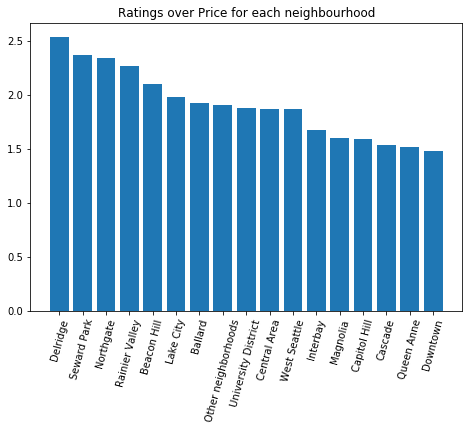

In [56]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
neighbourhoods=q1_agg.index
rating_over_price=q1_agg['rating/price']
ax.bar(neighbourhoods,rating_over_price)
plt.xticks(rotation=75)
plt.title('Ratings over Price for each neighbourhood')
plt.show()

# 3.2.3 Brief explanation for visualization
The above visualization is a bar chart showing the average rating/price for each neighbourhood. From the chart, I can tell that Delridge is ahead of all other neighborhood and there is clear cut between Beacon Hill and Lake City.

# 4. Question 2
Questions 2: What are features that could have a direct impact on the price and cleaning cost of Airbnb?

# 4.1 Prepare Data
Since I have identified the data types issue with cleaning fees and prices, I will first convert those two data types using function written above and then fill 0 for cleaning fees.

# 4.1.1 Convert Data Type

In [90]:
q2=listings.copy()
q2_numeric=q2[['host_total_listings_count','accommodates','bathrooms','bedrooms','beds',\
                  'price','cleaning_fee','guests_included','number_of_reviews','review_scores_rating']]
convert_dollar_to_float(q2_numeric,'price')
convert_dollar_to_float(q2_numeric,'cleaning_fee')

# 4.1.2 Convert Missing Values

In [93]:
q2_numeric['cleaning_fee'].fillna(0.0,inplace=True)

# 4.2 Evaluation

# 4.2.1 Visualization

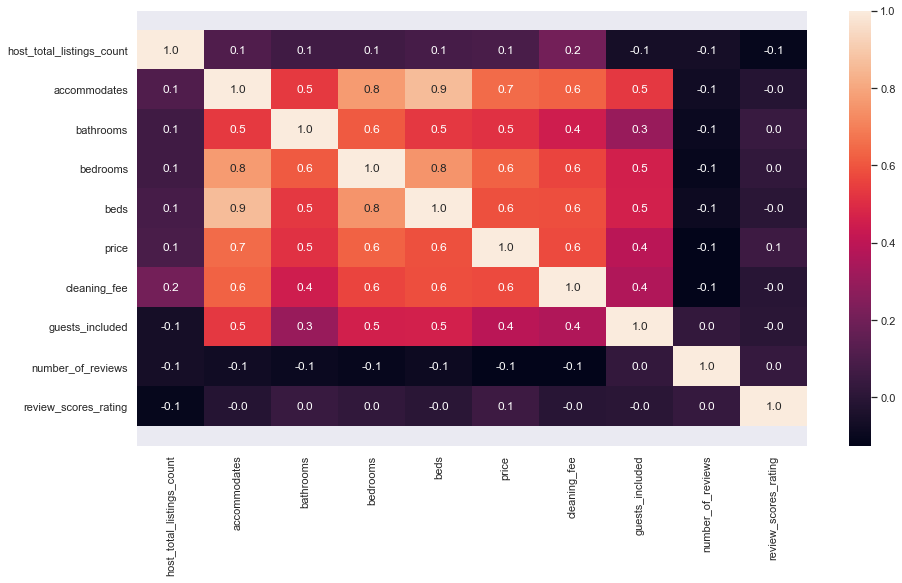

In [95]:
sns.set(rc = {'figure.figsize':(15,8)})

ax=sns.heatmap(q2_numeric.corr(),annot=True,fmt='.1f')
ax.set_ylim(len(q2_numeric.columns)+0.5, -0.5)
ax

# 4.2.2 Brief explanation for visualization

In the chart above, I was interested in seeing what aspect of the Airbnb is more positively or negatively influence the price and cleaning cost of the Airbnb, with a lighter color meaning a higher correlation and a darker color meaning a lower correlation.\
It makes sense that the accommodates, bathrooms, beds and square feet are pretty highly correlated to the prices and cleaning fees, since they normally means the Airbnb could hold more people, and thus having a higher price. But it is worthy to note that the square feet data is very limited and thus not very indicative of the correlation. It is also surprising that the reviews amount and ratings has very little correlation with price, meaning that the price and cleaning fee of the Airbnb doesn’t indicate how good the Airbnb is.

# 5 Question 3
Questions 3: What features would be the top indicators and drivers on the price of an Airbnb?
    
# 5.1 Prepare Data
In order to get more information from categorical values, I am planning to convert several categorical values that could provide information to predict price. 

# 5.1.1 Convert Categorical Values

In [102]:
q3=listings.copy()
obj_df=q3.select_dtypes(include=['object'])
#obj_df.head(2)
obj_df_subset=obj_df[['host_is_superhost','neighbourhood_group_cleansed','property_type','room_type','bed_type',\
                     'instant_bookable']]

In [103]:
dummy_cols_df = pd.get_dummies(obj_df_subset, dummy_na=True)

# 5.1.2 Convert Data Type

In [104]:
convert_dollar_to_float(q3,'price')
convert_dollar_to_float(q3,'cleaning_fee')

# 5.1.3 Convert Missing Values

In [105]:
q3['cleaning_fee'].fillna(0.0,inplace=True)

# 5.1.4 Summarize the data

In question 2, I have found bathrooms, bedrooms, beds and accommodates have high correlation with each other, thus, I would like to only keep one of them, which is accommodates. Host_total_listings_count also doesn't provide lots of information. Thus, this column will be removed as well. For the review scores, there are around 20% missing values. Removing 20% would deviate our models, thus, I will fill the review scores with mean scores

In [147]:
q3_numeric=q3[['accommodates','price','cleaning_fee',\
                  'guests_included','number_of_reviews','review_scores_rating']]
q3_subset=pd.concat([dummy_cols_df,q3_numeric], axis=1)
q3_subset['review_scores_rating'].mean()

mean_review=q3_subset['review_scores_rating'].mean()
q3_subset['review_scores_rating'].fillna(value=mean_review, inplace=True)
q3_subset=q3_subset.drop(['host_is_superhost_nan','neighbourhood_group_cleansed_nan'\
                          ,'room_type_nan','bed_type_nan','property_type_nan'\
                         ,'instant_bookable_nan'], axis=1)

In [148]:
q3_subset.describe()

,host_is_superhost_f,host_is_superhost_t,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,accommodates,price,cleaning_fee,guests_included,number_of_reviews,review_scores_rating
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.00000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,0.795705,0.203772,0.060241,0.030906,0.148507,0.023311,0.096647,0.020691,0.138816,0.002881,0.017548,0.015977,0.020953,0.207962,0.077266,0.041645,0.011524,0.031954,0.053169,0.447355,0.009691,0.002095,0.003405,0.005500,0.003405,0.000524,0.023834,0.000524,0.453903,0.010477,0.005762,0.001310,0.030906,0.000786,0.000262,0.665532,0.303824,0.030644,0.007072,0.003405,0.019382,0.01231,0.957831,0.845207,0.154793,3.349398,127.976166,45.062860,1.672603,22.223415,94.539262
std,0.403239,0.402854,0.237964,0.173086,0.355648,0.150908,0.295516,0.142368,0.345800,0.053605,0.131320,0.125403,0.143247,0.405903,0.267047,0.199802,0.106745,0.175900,0.224400,0.497286,0.097977,0.045733,0.058260,0.073969,0.058260,0.022884,0.152553,0.022884,0.497936,0.101831,0.075700,0.036169,0.173086,0.028024,0.016184,0.471866,0.459968,0.172375,0.083807,0.058260,0.137881,0.11028,0.201000,0.361755,0.361755,1.977599,90.250022,49.913798,1.311040,37.730892,6.020223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,2.000000,75.000000,0.000000,1.000000,2.000000,94.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

# 5.2 Data Modeling

# 5.2.1 Fit Model

In [156]:
def fit_model(dataframe):
    """
        This function first does a train and test split and then 
        fits a linear regression model for the cleaned dataset
        and then return the train and test r2 scores.
        
        Args: dataframe (pandas dataframe)
        Return: train_score (r2 score for train set)
                test_score (r2 score for test set)
                coefs_df (coefficient for all features)
    """
    
    
    X=dataframe.drop(columns=['price'], axis=1)
    y=dataframe['price']
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42, test_size=0.3)
    lm=LinearRegression(normalize=True)
    lm.fit(train_X,train_y)
    test_y_preds=lm.predict(test_X)
    train_y_preds=lm.predict(train_X)
    train_score=r2_score(train_y, train_y_preds)
    test_score=r2_score(test_y, test_y_preds)
    
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=train_X.columns
    coefs_df['coefs']=lm.coef_
    coefs_df['abs_coefs']=np.abs(lm.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    
    return train_score, test_score, coefs_df

In [157]:
train_score, test_score, coefs_df=fit_model(q3_subset)

print("The r-squared score for train model is {} and {} for test_model.".\
      format(train_score, test_score))

The r-squared score for train model is 0.5280428976619987 and 0.5512765421227939 for test_model.


# 5.3 Evaluation

# 5.3.1 Analysis

From the coefficient comparison, there are a lot of features that don't give good information. The coefs seems to be too large and all of those happens to categorical values. I think I should try lasso to get smaller coefficients.

In [158]:
coefs_df

,est_int,coefs,abs_coefs
38,bed_type_Airbed,3.196426e+15,3.196426e+15
42,bed_type_Real Bed,3.196426e+15,3.196426e+15
39,bed_type_Couch,3.196426e+15,3.196426e+15
40,bed_type_Futon,3.196426e+15,3.196426e+15
41,bed_type_Pull-out Sofa,3.196426e+15,3.196426e+15
37,room_type_Shared room,-4.556745e+14,4.556745e+14
36,room_type_Private room,-4.556745e+14,4.556745e+14
35,room_type_Entire home/apt,-4.556745e+14,4.556745e+14
43,instant_bookable_f,3.538271e+14,3.538271e+14
44,instant_bookable_t,3.538271e+14,3.538271e+14


In [159]:
def fit_lasso_model(dataframe):
    """
        This function first does a train and test split and then 
        fits a linear regression model for the cleaned dataset
        and then return the train and test r2 scores.
        
        Args: dataframe (pandas dataframe)
        Return: train_score (r2 score for train set)
                test_score (r2 score for test set)
                coefs_df (coefficient for all features)
    """
    
    
    X=dataframe.drop(columns=['price'], axis=1)
    y=dataframe['price']
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42, test_size=0.3)
    lm=Lasso()
    lm.fit(train_X,train_y)
    test_y_preds=lm.predict(test_X)
    train_y_preds=lm.predict(train_X)
    train_score=r2_score(train_y, train_y_preds)
    test_score=r2_score(test_y, test_y_preds)
    
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=train_X.columns
    coefs_df['coefs']=lm.coef_
    coefs_df['abs_coefs']=np.abs(lm.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    
    return train_score, test_score, coefs_df

In [162]:
train_score, test_score, coefs_df = fit_lasso_model(q3_subset)
print("The r-squared score for train model is {} and {} for test_model.".\
      format(train_score, test_score))

The r-squared score for train model is 0.4972663678322916 and 0.5150872802945451 for test_model.


In [164]:
coefs_df[coefs_df['coefs']!=0]

,est_int,coefs,abs_coefs
45,accommodates,1.962719e+01,1.962719e+01
35,room_type_Entire home/apt,1.397446e+01,1.397446e+01
8,neighbourhood_group_cleansed_Downtown,1.385373e+01,1.385373e+01
4,neighbourhood_group_cleansed_Capitol Hill,1.363956e+01,1.363956e+01
14,neighbourhood_group_cleansed_Queen Anne,1.117009e+01,1.117009e+01
47,guests_included,3.016980e+00,3.016980e+00
43,instant_bookable_f,2.612364e+00,2.612364e+00
19,property_type_Apartment,-1.344973e+00,1.344973e+00
49,review_scores_rating,7.808210e-01,7.808210e-01
46,cleaning_fee,4.489776e-01,4.489776e-01


After applying the lasso to do L1 regularization on linear regression, I am no longer getting super high coefficients from the features. I carve out all the non-zero features and it is obvious that accommodates, entire home/apt, Downtown, Capital Hill and Queen Anne neighborhood have a high impact on the price of Airbnb. 

# Appendix Unused Analysis

I did some additional analysis on availability of listings for each months\
and then learned from data that the information is not telling anything.

In [37]:
calendar['year']=pd.DatetimeIndex(calendar['date']).year
calendar['month']=pd.DatetimeIndex(calendar['date']).month
calendar_group1=calendar.groupby(['year','month']).size().\
                        to_frame('total_count').reset_index()
calendar_group2=calendar[calendar['available']=='t'].groupby(['year','month']).\
                        size().to_frame('count').reset_index()
calendar_total=pd.merge(calendar_group1, calendar_group2,how='inner', \
                       left_on=['year','month'],\
                        right_on=['year','month']\
                       )[['year','month','count','total_count']]
calendar_total['ratio']=calendar_total['count']/calendar_total['total_count']
calendar_total.sort_values('ratio',ascending=False)

,year,month,count,total_count,ratio
12,2017,1,5698,7636,0.746202
11,2016,12,87061,118358,0.735573
10,2016,11,81780,114540,0.713986
2,2016,3,83938,118358,0.709187
9,2016,10,82438,118358,0.696514
4,2016,5,79971,118358,0.675670
8,2016,9,77246,114540,0.674402
5,2016,6,77244,114540,0.674384
3,2016,4,76037,114540,0.663847
1,2016,2,73321,110722,0.662208


Thank you for reading through the whole projects! Thank you very much!